# Linear Models

A **linear model** makes a prediction by simply computing a **weighted sum of the input features**, plus a constant called the **bias term** (or intercept term):

$\displaystyle \hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \sum\limits_{i=1}^{n}{\theta_ix_i+\theta_0}$

This is the **hypothesis function** of the linear model, where: 
- $ \hat{y}$ is the predicted value, 
- $n$ is the number of features, 
- $x_i$ is the value of feature i, 
- $\theta_j$ is the parameter j of the model: bias term $\theta_0$ and feature weights $\theta_1$, $\theta_2$, ..., $\theta_n$

In order to compare models, we need to define a measure of **how well a model fits the training data**, called **Cost Function $J$**. In order to define this cost, we can consider the difference between the actual values of the training set and the predicted values (**residuals**) from the model. Let's define the **training set** of m example as a matrix of m rows, in which each row is the i sample:

$\displaystyle \left [ \begin{matrix} x_0^{(1)} & x_1^{(1)} & ... & x_n^{(1)} \\ x_0^{(2)} & x_1^{(2)} & ... & x_n^{(2)} \\ ... & ... & ... & ... \\ x_0^{(m)} & x_1^{(m)} & ... & x_n^{(m)} \end{matrix}  \right ] \quad \left [ \begin{matrix} y^{(1)} \\ y^{(2)} \\ ... \\ y^{(m)} \end{matrix} \right ]$

In case of a single feature we can visualize the residuals:

![](images/residuals.png)

We cannot simply sum the residuals, because the positive and negative residuals would cancel each other out. So a common approach is to use **the mean squared error (MSE) function**:

$\displaystyle J(\theta_1, \theta_2, ..., \theta_n) = \frac{1}{m}\sum\limits_{i=1}^{m}{(\hat{y}^{(i)}- y^{(i)})^2} = \frac{1}{m}\sum\limits_{i=1}^{m}{\left(\sum\limits_{j=1}^{n}{\theta_jx^{(i)}_j+\theta_0} - y^{(i)}\right)^2 }$ 

This can be written much more concisely using a vectorized form:

$\displaystyle \theta = \left [ \begin{matrix} \theta_0 \\ \theta_1 \\ ... \\ \theta_n \end{matrix} \right ] \quad x = \left [ \begin{matrix} x_0=1 \\ x_1 \\ ... \\ x_n \end{matrix} \right ]$

where $x_0$ always equal to 1 in order to consider the bias term, so the hypothesis function can be written as:

$\displaystyle \hat{y} = \theta^{T} x$

and we can remove one of the summations in the cost function:

$\displaystyle J(\theta) = \frac{1}{m}\sum\limits_{i=1}^{m}{\left( \theta^{T} x^{(i)} - y^{(i)}\right)^2 }$ 

we can define also the training set in a matrix form:

$\displaystyle X = \left [ \begin{matrix} x_0^{(1)} & x_1^{(1)} & ... & x_n^{(1)} \\ x_0^{(2)} & x_1^{(2)} & ... & x_n^{(2)} \\ ... & ... & ... & ... \\ x_0^{(m)} & x_1^{(m)} & ... & x_n^{(m)} \end{matrix}  \right ] = \left[ \begin{matrix} x^{(1)T} \\ x^{(2)T} \\ ... \\ x^{(m)T} \end{matrix} \right] \quad y = \left [ \begin{matrix} y^{(1)} \\ y^{(2)} \\ ... \\ y^{(m)} \end{matrix} \right ]$

and remove also the second summation:

$\displaystyle J(\theta) = \frac{1}{m} (X\theta-y)^{T}(X\theta-y)$

to see this, look at the following example: 

$\displaystyle v^Tv = \left[ v_1, v_2, ..., v_k \right] \left[ \begin{matrix} v_1 \\ v_2 \\ ... \\ v_k \end{matrix} \right] = v_1 v_1 + v_2 v_2 + ... + v_k v_k = \sum\limits_{i=1}^{k}{v_i^2}$  

## Normal Equation

The linear cost function can be minimized using a **closed-form solution** (a mathematical equation that gives the result directly), called **Normal Equation**. Using some matrix transpose identities and removing the 1/m term, we can simplify the cost function expression:

$\displaystyle J(\theta) = ((X \theta)^T - y^T)(X \theta - y)=(X \theta)^T X \theta - (X \theta)^T y - y^T(X \theta) + y^T y$

Notice that $X \theta$ and $y$ are vectors, so when we multiply one by another, it doesn't matter the order (as long as the dimensions work out), and we can further simplify the expression:

$\displaystyle J(\theta)= \theta^T X^T X \theta - 2 (X \theta)^T y + y^T y $

To find where the cost function has a minimum, we can derive by $\theta$ and compare to 0. Deriving by a vector may feel uncomfortable, but recall that here we only use matrix notation to conveniently represent a system of linear formula. So we derive by each component of the vector, and then combine the resulting derivatives into a vector again ([more details](https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/)).  The result is:

$\displaystyle \frac{\partial J}{\partial \theta} = 2 X^T X \theta - 2 X^T y = 0$

$\displaystyle X^T X \theta = X^T y$

Now, assuming that the matrix $X^T X$ is invertible:

$\displaystyle \hat{\theta} = (X^T X)^{-1} X^T y $

where the term $(X^{T}X)^{-1}X^{T}$ is called **pseudoinverse** of $X$ and it is expressed as $X^{+}$

We can try this formula by generating some linear-looking data (e.g. we use y = 4 + 3x + some gaussian noise), then we compute the $\hat{\theta}$ using the Normal Equation. In order to implement it, we can use NumPy linear algebra module **linalg**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# the rand function creates an array of the given shape 
# and populate it with random samples from a uniform distribution
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

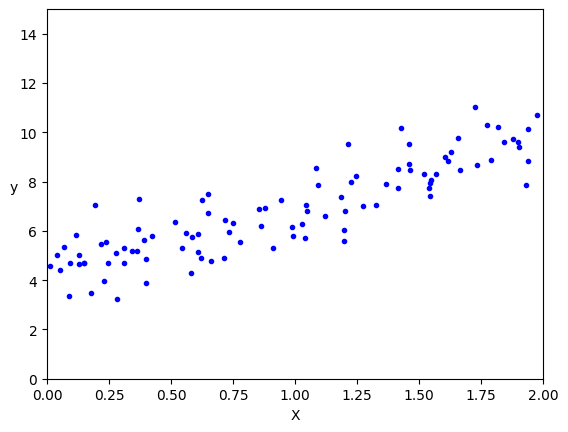

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

We prepare the X matrix adding the $x_0=1$ column and then we compute the $\hat{\theta}$ using the Normal Equation: 

In [3]:
X_b = np.c_[np.ones((100, 1)), X]

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print("Optimal theta:", theta_best[0], theta_best[1])

Optimal theta: [4.21509616] [2.77011339]


We would have hoped for $\theta_0= 4$ and $\theta_1= 3$. The result is close enough, but the noise made it impossible to recover the exact parameters of the original function. We can make plot the model predictions: 

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)

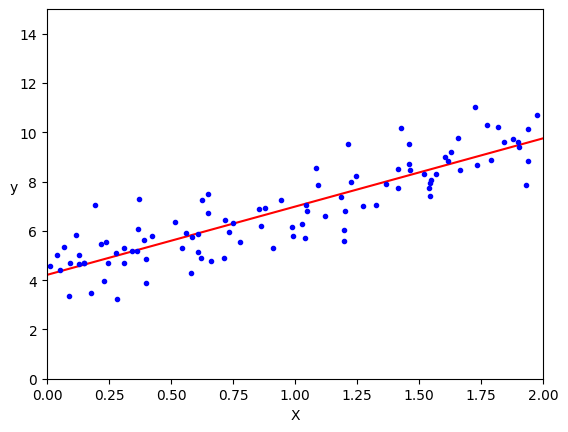

In [5]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

We can perform linear regression also using the SciKit-Learn library. It uses a **more efficient approach to calculate the pseudoinverse** and it **handles edge cases**: the Normal Equation **may not work if the matrix is not invertible (singular)**, such as if m < n or if some features are redundant, but the **pseudoinverse is always defined**.

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Optimal theta:", lin_reg.intercept_, lin_reg.coef_)

Optimal theta: [4.21509616] [[2.77011339]]


The **computational complexity** of inverting such matrix is typically about $O(n^2)$ to $O(n^3)$, depending on the implementation. This gets **very slow when the number of features grows large** (e.g., 100,000). However the complexity is **linear with regard to the number of instances** in the training set ($O(m)$). So this method handle large training sets efficiently, provided they can fit in memory. Also, **predictions are very fast**: the computational complexity is linear with regard to both the number of instances you want to predict and the number of features. 

## Gradient Descent

A very different way to train a Linear Regression model, which is better **suited for cases where there are a large number of features or too many training instances to fit in memory**. Gradient Descent is a **generic optimization algorithm** capable of finding optimal solutions to a wide range of problems, by approaching the minimum of any **differentiable function**.

The gradient is the **vector of partial derivatives** and it gives **the direction in which a function most quickly increases**. Accordingly, the main idea of this approach to maximizing/minimizing a function is:

- pick a random starting point, 
- compute the gradient, 
- take a small step in the direction/opposite of the gradient (i.e., the direction that causes the function to increase/decrease the most), 
- repeat with the new point, 
- once the gradient is zero, we have reached a maximum/minimum! 

The general idea of Gradient Descent is to **tweak parameters iteratively in order to minimize the cost function**. It measures the **local gradient** of the error function and goes in the direction of descending gradient. [Here](https://www.ruder.io/optimizing-gradient-descent/) it is possible to read a really interesting overview on Gradient Descent. 

Concretely, we start by filling $\theta$ with random values (**random initialization**), then we improve it gradually, taking one small learning step at a time to decrease the cost function, until the algorithm converges to a minimum.

![](images/gradient-descent.png)

An important parameter is the **size of the steps**, called the **learning rate** hyperparameter. If it is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if it is too high, it might jump across the valley and end up on the other side, possibly even higher up than it were before. This might make the algorithm diverge.

![](images/learning-rate-parameter.png)

Moreover, not all cost functions **have just one minimun value**, making convergence to the minimum difficult. 

![](images/local-minimum.png)

Fortunately, the MSE cost function is **a convex function**, this implies that there are no **local minimum**, just one **global minimum** and Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if we wait long enough and if the learning rate is not too high)

But, how we can computer the gradient? If the cost is a function of one variable, its derivative at a point measures how the function changes when we make a very small change to the point. The derivative of a function f is defined as **the limit of the difference quotients**:

$\displaystyle f'(x) = \underset{h \to 0}\lim\dfrac{f(x + h) - f(x)}{h}$

In [7]:
def estimate_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

The derivative is also **the slope of the tangent line** at the point, while the difference quotient is the slope of the not-quite tangent line that runs through the point and its small variation. As the change gets smaller and smaller, the not-quite-tangent line gets closer and closer to the tangent line. 

When the function has many variables, it has **multiple partial derivatives**, each indicating how the function changes when we make small changes in just one of the input variables. We can compute the gradient of the function with regard to each variables. In other words, we calculate how much the function will change if we change a variable just a little bit. The **gradient vector**, noted $\nabla f(x)$, contains all the partial derivatives of the function.

$\displaystyle \nabla_\theta f(x)= \left [ \begin{matrix} \frac{\partial f(x)}{\partial x_1}  \\ \frac{\partial f(x)}{\partial x_2} \\ ... \\ \frac{\partial f(x)}{\partial x_n} \end{matrix} \right ]$

We calculate each partial derivative by treating it as a function of just one variable, holding the other variables fixed.

In [8]:
def estimate_partial_derivative(f, x, i, h):
    w = [x_j + (h if j == i else 0) for j, x_j in enumerate(x)]
    return (f(w) - f(x)) / h

In [9]:
def estimate_gradient(f, x, h=0.001):
    gradient = np.array([estimate_partial_derivative(f, x, i, h) for i in range(len(x))])
    return  gradient

Now we can use the gradient to find the minimum of a function. We’ll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small. we use the learning rate factor to determine the size of each step:

$\displaystyle x^{next} = x - \eta \nabla f(x)$

Let's implement it in python:

In [12]:
def gradient_step(f, x, learning_rate):
    gradient = estimate_gradient(f, x)
    x_next = x - learning_rate * gradient
    return x_next

As a simple example, suppose we have a quadratic function of two variables. We can visualize the function and the path followed by Gradient Descent to find the minimum.

In [13]:
def f(x):
    return x[0] ** 2 + x[1] ** 2

We can plot the function:

In [14]:
def show_f(ax, f, x1_min, x1_max, x2_min, x2_max, alpha=0.2):
    x1 = np.linspace(x1_min, x1_max, 50)
    x2 = np.linspace(x2_min, x2_max, 50)

    X1, X2 = np.meshgrid(x1, x2)

    X = np.stack((X1.ravel(), X2.ravel()))
    X3 = f(X.reshape((2, -1)))
    X3 = X3.reshape(X1.shape)

    ax.plot_surface(X1, X2, X3, alpha=alpha)

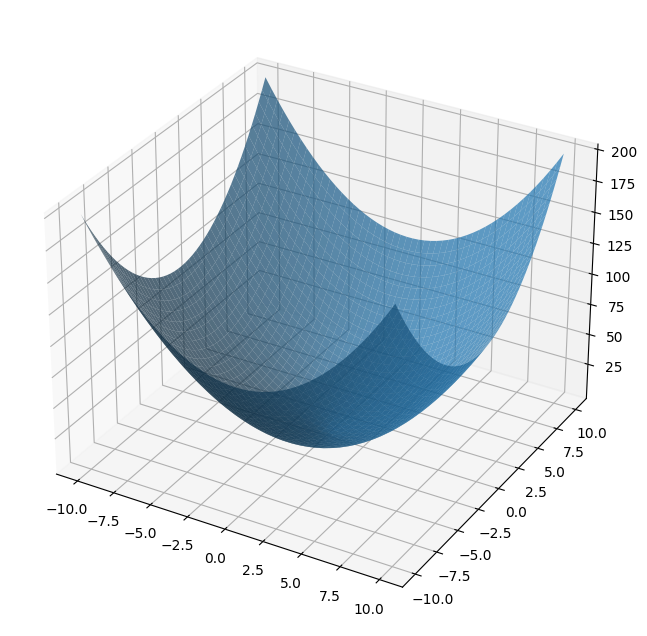

In [15]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(111, projection='3d')
show_f(ax, f, x1_min=-10, x1_max=10, x2_min=-10, x2_max=10, alpha=0.7);

It’s easy to see that the function is smallest when its input is a vector of zeros. But imagine we didn’t know that. Let’s use gradients to find the minimum. We’ll just pick a random starting point and then take tiny steps in the opposite direction of the gradient until we reach a point where the gradient is very small:

In [18]:
import random

def gradient_descent(f, x_start, steps, learning_rate):
    path = np.empty((steps+1,) + x_start.shape) 

    path[0] = x_start
    x = x_start
    for step in range(steps):
        x = gradient_step(f, x, learning_rate)
        path[step+1] = x
 
    print("Minimum:", x)
    return path

In [19]:
# pick a random starting point
x_start = np.array([9, 9])

# start gradient descent algorithm
path = gradient_descent(f, x_start, steps=100, learning_rate=0.1)

Minimum: [-0.0005 -0.0005]


We can visualize the steps taken by the Gradient Descent algorithm to find the minimum:

In [20]:
def show_path(ax, f, path, x1_min, x1_max, x2_min, x2_max, color='b-', linewidth=3):

    X1_path = [point[0] for point in path]
    X2_path = [point[1] for point in path]
    F_path  = [f(point) for point in path]
    ax.plot(X1_path, X2_path, F_path, color, linewidth=linewidth)

    ax.axes.set_xlim3d(left=x1_min, right=x1_max)
    ax.axes.set_ylim3d(bottom=x2_min, top=x2_max)

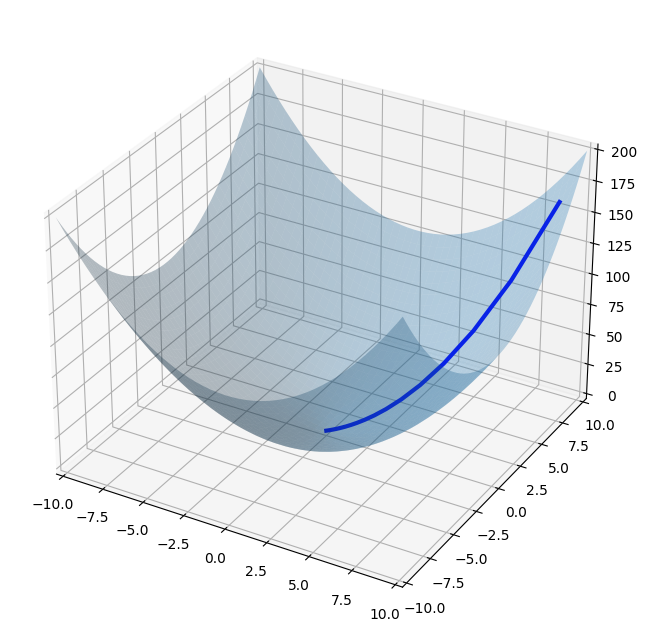

In [23]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(111, projection='3d')
x1_min=-10; x1_max=10; x2_min=-10; x2_max=10
show_f(ax, f, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, f, path, x1_min, x1_max, x2_min, x2_max);

Let' try with **a too short learning rate**, we can see that after the same number of steps it is really far from the minimum and **we need to wait a lot** before reaching the correct value. Conversely, if we use **a too big learning rate** we can see that the algorithm **diverges**:

In [24]:
path_lr_1 = gradient_descent(f, x_start, steps=100, learning_rate=0.001)

path_lr_2 = gradient_descent(f, x_start, steps=100, learning_rate=1.015)

Minimum: [7.36701053 7.36701053]
Minimum: [172.97679718 172.97679718]


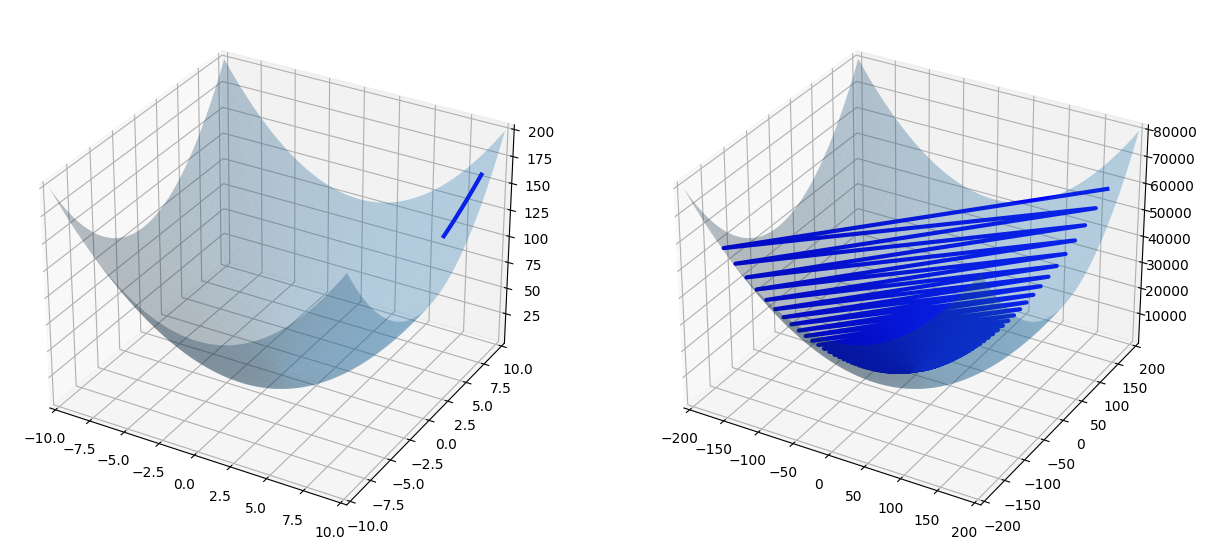

In [25]:
fig = plt.figure(figsize = [15, 8])

ax = fig.add_subplot(121, projection='3d')
x1_min=-10; x1_max=10; x2_min=-10; x2_max=10
show_f(ax, f, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, f, path_lr_1, x1_min, x1_max, x2_min, x2_max);

ax = fig.add_subplot(122, projection='3d')
x1_min=-200; x1_max=200; x2_min=-200; x2_max=200
show_f(ax, f, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, f, path_lr_2, x1_min, x1_max, x2_min, x2_max);

Moreover, if we consider **a more complex function** with **many local minimum**, the algorithm may not find the global minimum:

In [26]:
def f(x):
    return np.cos(x[0]) * np.sin(x[1])

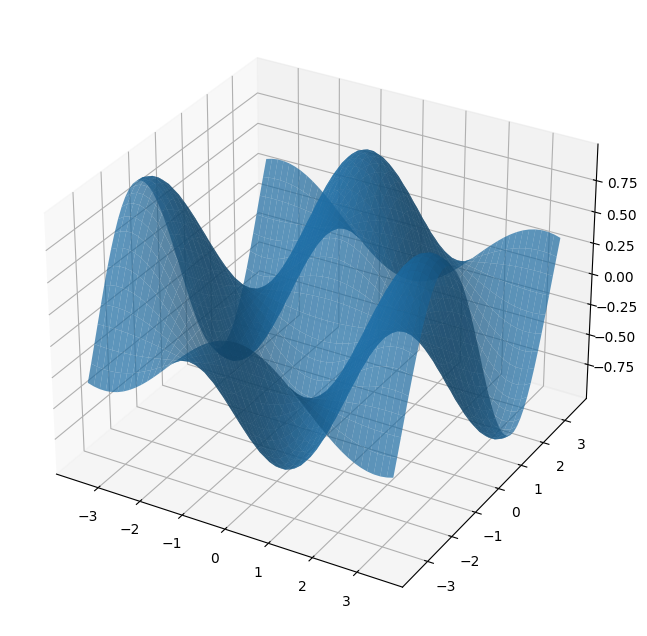

In [27]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(111, projection='3d')
show_f(ax, f, x1_min=-3.5, x1_max=3.5, x2_min=-3.5, x2_max=3.5, alpha=0.7);

Let's start the algorithm from two different starting point:

In [28]:
x_start_a = np.array([[1.6], [0]])
x_start_b = np.array([[1.5], [0]])

path_a = gradient_descent(f, x_start_a, steps=50, learning_rate=0.1)
path_b = gradient_descent(f, x_start_b, steps=50, learning_rate=0.1)

Minimum: [[2.64224501]
 [1.07129816]]
Minimum: [[ 0.2036949 ]
 [-1.36673638]]


It find to different minimum values, depending on the starting point. This is because the function is not convex. We can show the different paths followed by the algorithm:

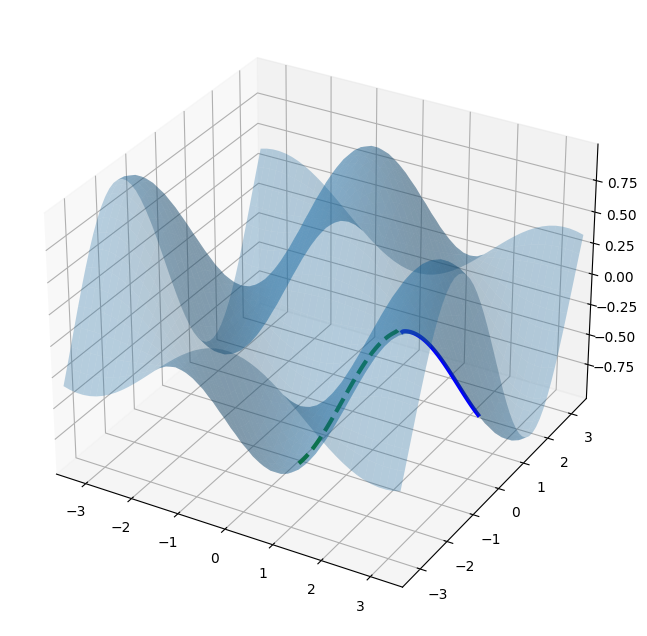

In [29]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(111, projection='3d')
x1_min=-3.5; x1_max=3.5; x2_min=-3.5; x2_max=3.5
show_f(ax, f, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, f, path_a, x1_min, x1_max, x2_min, x2_max);
show_path(ax, f, path_b, x1_min, x1_max, x2_min, x2_max, color='g--');

## Batch Gradient Descent (BGD)

We can apply the Gradient Descent idea to fit our linear model. We need to compute the gradient of the cost function with regard to each model parameter. Notice that this involves **calculations over the full training set at each step!** This algorithm is called **Batch Gradient Descent (BGD)**: it uses the whole batch of training data at every step. It is **really slow on large training sets**. First of all, we need to define the cost function to be minimized:

In [30]:
def J(theta):
    m = len(X_b)
    a = X_b.dot(theta) - y  
    b = 1/m * np.sum(a**2, axis=0)
    return b

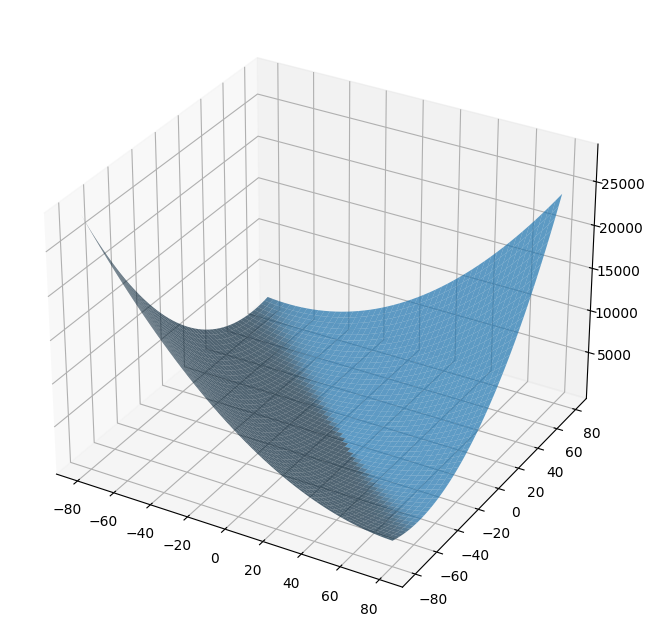

In [31]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(111, projection='3d')
show_f(ax, J, x1_min=-80, x1_max=80, x2_min=-80, x2_max=80, alpha=0.7);

Then we can use the gradient descent algorithm to minimize this cost and find the optimal value for the parameters vector, starting from a random point. In this case, the cost function is quadratic, so we are assured to find the global minimum: 

In [32]:
theta_start = np.array([[80], [80]])

path_bgd = gradient_descent(J, theta_start, steps=5000, learning_rate=0.01)

Minimum: [[4.21499128]
 [2.76969324]]


That’s exactly what the Normal Equation found! BGD worked perfectly and we can see the path followed by the algorithm in the parameter space:

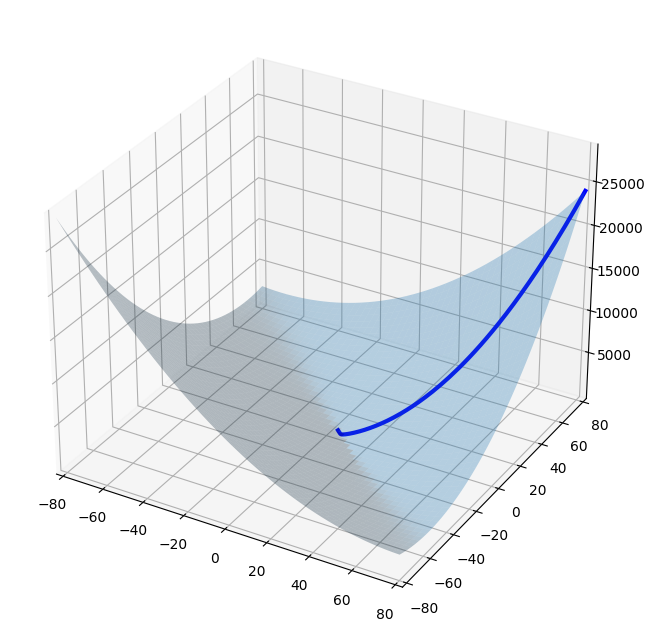

In [34]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(111, projection='3d')
x1_min=-80; x1_max=80; x2_min=-80; x2_max=80
show_f(ax, J, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, J, path_bgd, x1_min, x1_max, x2_min, x2_max);

But what if we had used **a different learning rate**:

In [35]:
theta_start = np.array([[2],[1]])

learning_rates = [0.01, 0.1, 0.4]
theta_paths = []

for learning_rate in learning_rates:
    theta_paths.append(gradient_descent(J, theta_start, 
                       steps=10, learning_rate=learning_rate))

Minimum: [[2.64831361]
 [1.7095603 ]]
Minimum: [[3.94644357]
 [2.98871312]]
Minimum: [[4.10410605]
 [2.81586235]]


To understand the differences, we can visualize the linear solution at each step of the algorithm using the current theta value:

In [36]:
def plot_lines(theta_path, learning_rate):
    for theta in theta_path:
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, "b.")
    plt.xlabel("x")
    plt.ylabel("y", rotation=0)
    plt.axis([0, 2, 0, 15])
    plt.title(r"learning rate = {}".format(learning_rate))

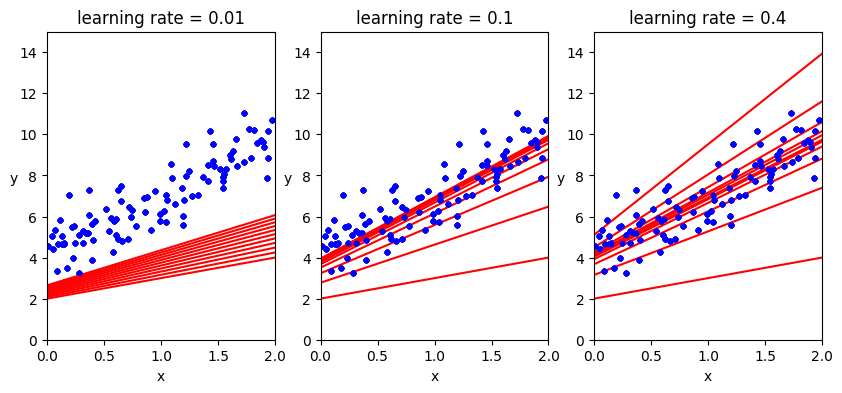

In [37]:
plt.figure(figsize=(10,4))

for i, learning_rate in enumerate(learning_rates):
    plt.subplot(131+i); 
    plot_lines(theta_paths[i], learning_rate=learning_rate)


On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step. To find a good learning rate, we can use grid search. We may wonder how to set the number of iterations. If it is too low, we will still be far away from the optimal solution when the algorithm stops; but if it is too high, we will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to **interrupt the algorithm when the gradient vector becomes tiny** (when its norm becomes smaller than a tiny number).

## Stochastic Gradiend Descent (SGD)

The major drawback of BGD approach is that we had to evaluate the gradients on the entire dataset before we could take a gradient step and update our parameters. In the example it was fine, because our dataset was "small" and the gradient computation was "cheap". Real models, however, will frequently have large datasets and expensive gradient computations. In that case we’ll want to take gradient steps more often. 

An idea is to use **only a single instance of the training set at each iteration**. This is called **Stochastic Gradient Descent**. The main advantage of this approach is that it is **much faster**, because it has very little data to manipulate at every iteration, and also it makes possible to **train on huge training sets**, since only one instance needs to be in memory at each iteration. However due to its stochastic nature, this algorithm is much less regular than BGD: instead of gently decreasing until it reaches the minimum, **the path will bounce up and down** (because at each interaction the cost function is different), **decreasing only on average**. Over time it will end up very close to the minimum, but once it stops, the final parameter values are good, but not optimal.

![](images/stochastic-gradient-descent.png)

When the cost function is very irregular, this can actually help the algorithm **jump out of local minima**. In general, **randomness is good to escape from local optima**, but bad because the algorithm can never settle at the minimum. One solution to this dilemma is to **gradually reduce the learning rate**. The step starts large (to escape local minima), then get smaller (to settle at the global minimum). The function that determines the learning rate at each iteration is called the **learning schedule**.

In order to implement this idea, we need to redefine the cost function, because we are now considering only one random instance at a time:

In [73]:
def J_stochastic(theta):        
    a = x_random.dot(theta) - y_random
    b = np.sum(a**2, axis=0)
    return b

In that case the cost function is different at each step, because it is based on a single instance:

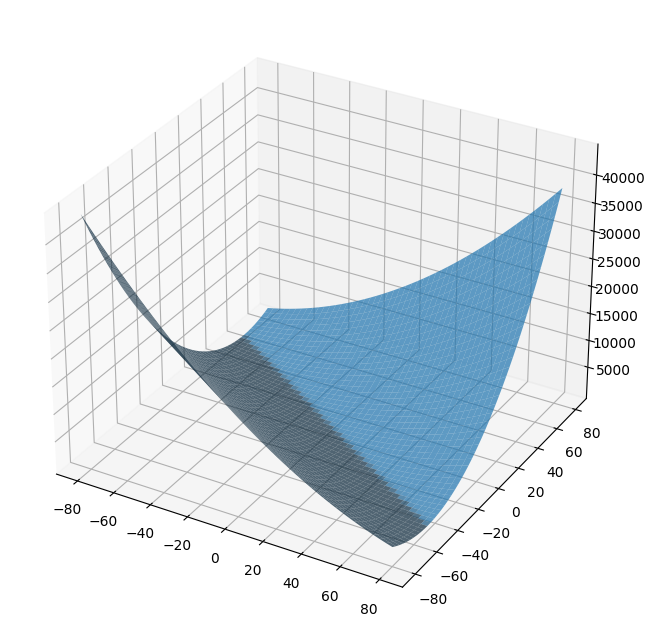

In [74]:
random_index = np.random.randint(len(X_b))
x_random = X_b[random_index:random_index+1]
y_random = y[random_index:random_index+1]

fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(111, projection='3d')
show_f(ax, J_stochastic, x1_min=-80, x1_max=80, x2_min=-80, x2_max=80, alpha=0.7);

Then we need to define the stochastic gradient descent function, that takes a random instance at each step and computes the gradient based only on that single instance:

In [75]:
def stochastic_gradient_descent(f, x_start, steps, learning_rate):
    path = np.empty((steps+1,) + x_start.shape) 

    global x_random, y_random
    
    path[0] = x_start
    x = x_start

    for step in range(steps):
        random_index = np.random.randint(len(X_b))
        x_random = X_b[random_index:random_index+1]
        y_random = y[random_index:random_index+1]

        x = gradient_step(f, x, learning_rate)
        path[step+1] = x
        
    print("Minimum:", x)

    return path

In [76]:
theta_start = np.array([[80], [80]])

path_sgd = stochastic_gradient_descent(J_stochastic, theta_start, steps=500, learning_rate=0.1)

Minimum: [[3.97545019]
 [2.61990356]]


We can see that the path is less regular than the one followed by BGD. To better understand the differences, we can visualize the path near the minimum:

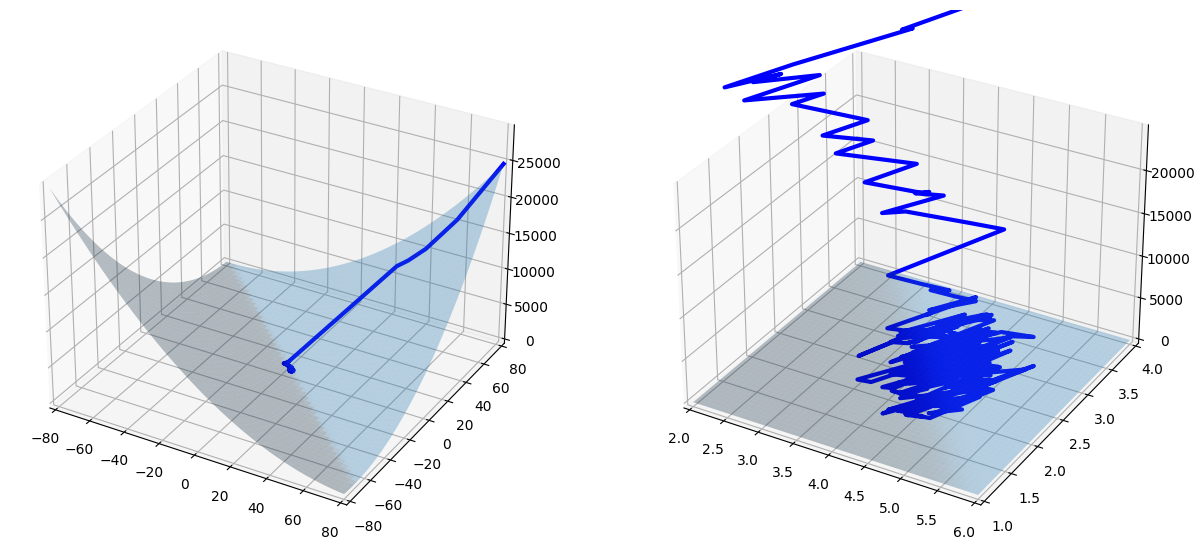

In [77]:
fig = plt.figure(figsize = [15, 8])

ax = fig.add_subplot(121, projection='3d')
x1_min=-80; x1_max=80; x2_min=-80; x2_max=80;
show_f(ax, J_stochastic, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, J_stochastic, path_sgd, x1_min, x1_max, x2_min, x2_max);

ax = fig.add_subplot(122, projection='3d')
x1_min=2; x1_max=6; x2_min=1; x2_max=4;
show_f(ax, J_stochastic, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, J_stochastic, path_sgd, x1_min, x1_max, x2_min, x2_max);

## Mini-batch Gradient Descent (MGD)

We can use a compromise between BGD and SGD: at each step, instead of computing the gradients based on the full training set (as in BGD) or based on just one instance (as in SGD), **Mini-batch Gradient Descent** computes the gradients on **small random subsets of instances called mini-batches**. The progress in parameter space is **less erratic**, especially with fairly large mini-batches. As a result, MGD will end up **walking around a bit closer to the minimum** than SGD, but **it may be harder for it to escape from local minima**. We can implement MGD similar to SGD:

In [78]:
def J_minibatch(theta):
    m = len(x_mb)
    a = x_mb.dot(theta) - y_mb
    b = 1/m * np.sum(a**2, axis=0)
    return b

In [79]:
def minibatch_gradient_descent(f, x_start, steps, learning_rate, minibatch_size):
    path = np.empty((steps+1,) + x_start.shape) 

    global x_mb, y_mb
    
    path[0] = x_start
    x = x_start

    for step in range(steps):
        shuffled_indices = np.random.permutation(len(X_b))
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        x_mb = X_b_shuffled[0:minibatch_size]
        y_mb = y_shuffled[0:minibatch_size]
        
        x = gradient_step(f, x, learning_rate)
        path[step+1] = x
        
    print("Minimum:", x)

    return path

In [80]:
theta_start = np.array([[80], [80]])

path_mgd = minibatch_gradient_descent(J_minibatch, theta_start, steps=500, learning_rate=0.1, minibatch_size=20)

Minimum: [[4.32237198]
 [2.71121478]]


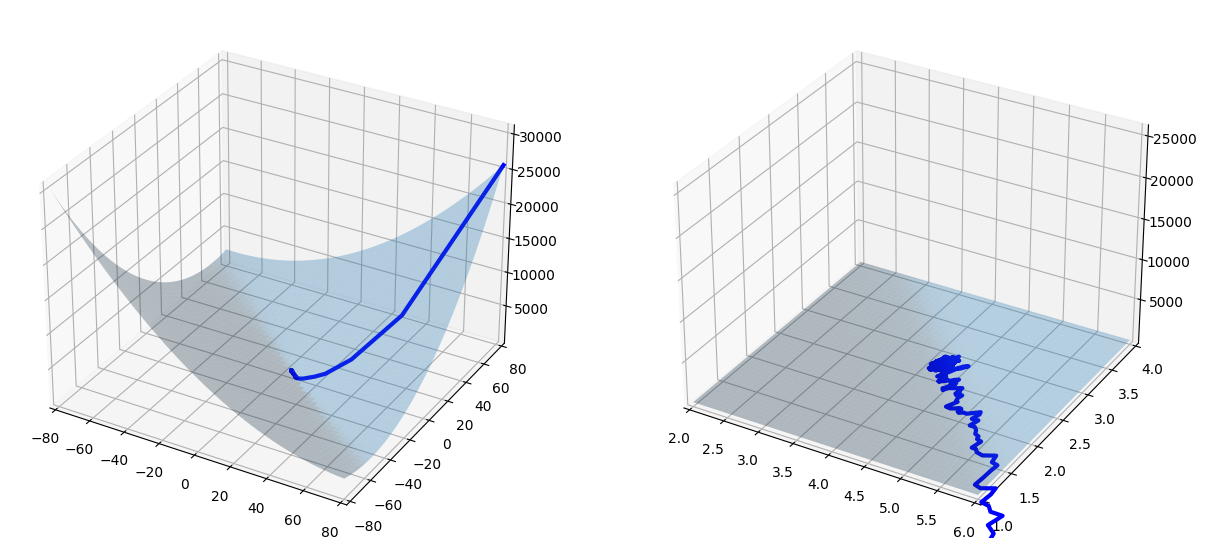

In [81]:
fig = plt.figure(figsize = [15, 8])

ax = fig.add_subplot(121, projection='3d')
x1_min=-80; x1_max=80; x2_min=-80; x2_max=80;
show_f(ax, J_minibatch, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, J_minibatch, path_mgd, x1_min, x1_max, x2_min, x2_max);

ax = fig.add_subplot(122, projection='3d')
x1_min=2; x1_max=6; x2_min=1; x2_max=4;
show_f(ax, J_minibatch, x1_min, x1_max, x2_min, x2_max, alpha=0.3);
show_path(ax, J_minibatch, path_mgd, x1_min, x1_max, x2_min, x2_max);

In order to visualize the different behaviors of BGD, SGD and MGD, we can show the paths taken by the three algorithms in the parameter space during training:

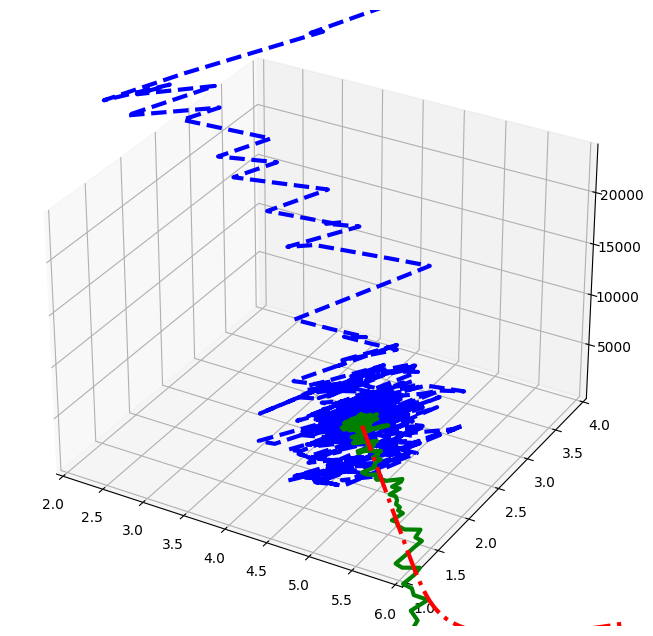

In [85]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(111, projection='3d')
x1_min=2; x1_max=6; x2_min=1; x2_max=4;
show_path(ax, J, path_sgd, x1_min, x1_max, x2_min, x2_max, color='b--');
show_path(ax, J, path_mgd, x1_min, x1_max, x2_min, x2_max, color='g-');
show_path(ax, J, path_bgd, x1_min, x1_max, x2_min, x2_max, color='r-.');

They all end up near the minimum, but BGD path actually stops at the minimum, while both SGD and MGD continue to walk around. However, BGD takes a lot of time to take each step, and SGD and MGD would also reach the minimum if you used a good learning schedule.

We can define two concepts, the first one the **training step**, which is **one iteration of the training process**, where a subset of the training data (all in the case of the BGD, just one in the case of SGD or some instances for MBGD) is used to update the parameters. The secondo is **epoch** is one **complete pass through the entire training dataset**. In other words, during one epoch, the model sees every example in the dataset and updates its parameters accordingly. Training for multiple epochs allows the model to learn from the dataset multiple times, refining its parameters with each pass Multiple training steps are usually performed within each epoch.

Scikit-Learn has a linear regressor based on SGD and MGD called **SGDRegressor**:

In [86]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000,   # runs for maximum 1,000 steps
                       tol=1e-3,        # or until loss drops 0.001
                       penalty=None,    # does not use regularization
                       eta0=0.1)        # starts with a learning rate of 0.1
                       
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.21563818] [2.7829163]


## Polynomial regression

What if the data are more complex than a straight line? We can use a **linear model also to fit nonlinear data**. A way to do this is to **add powers of each feature as new features**, then train a linear model on this extended set of features. This technique is called **Polynomial Regression**. For example, we can model the relationship between the independent variable x and the dependent variable y as an n-degree polynomial:

$\displaystyle \hat{y}  =\theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3 + ... + \theta_n x^n = \sum\limits_{i=0}^{n}{\theta_i x^i} $

Let’s look at an example with some nonlinear data, based on a simple quadratic equation plus noise, like $y = 0.5 x^2 + x + 2.0 + noise$

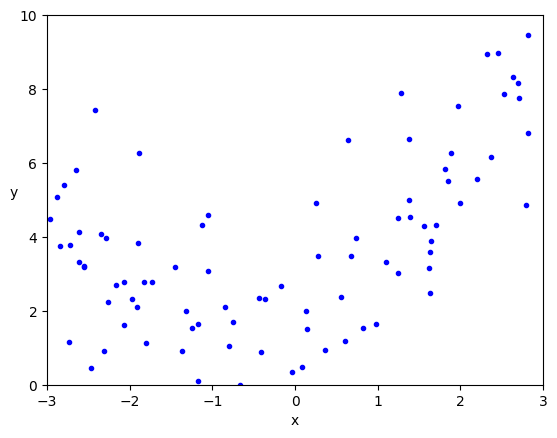

In [87]:
np.random.seed(42)

m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + 2 * np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.axis([-3, 3, 0, 10])

plt.show()

Clearly, a straight line will never fit this data properly. So we can use Scikit-Learn’s **PolynomialFeatures** class to transform our training data, adding the square of each feature in the training set as a new feature:

In [89]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


The new dataset now contains the original feature plus the square of this feature. Now we can fit a LinearRegression model to this extended training data:

In [90]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.56269162] [[0.86733786 0.62912527]]


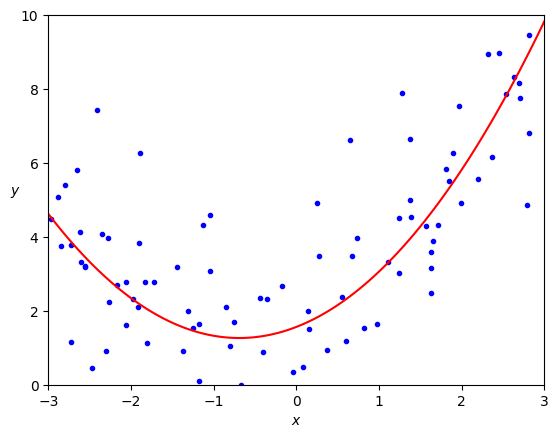

In [91]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])

plt.show()

The model estimate is similar to the original function used to generate data. Note that when there are multiple features, Polynomial Regression is capable of **finding relationships between those features**, because it also adds **all combinations of features** up to the given degree.  

![](images/polynomial-features.png)

So, beware of the **combinatorial explosion of features!**. If we perform **high-degree Polynomial Regression**, we will likely fit the training data much better. For example, in the following we apply a high-degree polynomial model and compare it with a pure linear model and a quadratic model (we use also the SciKit-Learn **Pipeline** class to make the code more readable):

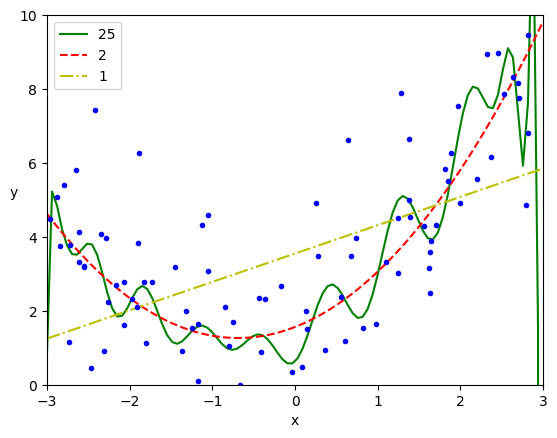

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
regressor = LinearRegression()

for style, degree in (("g-", 25), ("r--", 2), ("y-.", 1)):

    features = PolynomialFeatures(degree=degree, include_bias=False)
    
    regression = Pipeline([ ("features", features),
                            ("scaler", scaler), 
                            ("regressor", regressor) ])
    regression.fit(X, y)
    
    y_new = regression.predict(X_new)
    plt.plot(X_new, y_new, style, label=str(degree))

plt.plot(X, y, "b.")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.axis([-3, 3, 0, 10])

plt.show()

The high-degree polynomial model is **overfitting** the training data, while the linear model is **underfitting** it. The model that will generalize best in this case is the quadratic model.

## Bias-Variance Tradeoff

In general, **how can we decide how complex the model should be?** One way is to use cross-validation: 

- if a model performs **well on the training data but generalizes poorly** according to the cross-validation metrics, then your model **is overfitting**; 
- if it performs **poorly on both**, then it **is underfitting**. 

Another way is to look at the **learning curves**, plots of the model’s performance on the training set and the validation set as a function of the training set size. To generate the plots, we train the model several times on different subsets of the training set. Lets' see and example using tree different models: the linear model, the quadratic model and the high-degree polynomial model:

In [93]:
linear_regression = LinearRegression()

quadratic_regression = Pipeline([ ("features", PolynomialFeatures(degree=2, include_bias=False)),
                                  ("lin_reg", LinearRegression()) ])
                                  
polynomial_regression = Pipeline([ ("features", PolynomialFeatures(degree=20, include_bias=False)),
                                   ("lin_reg", LinearRegression()) ])

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def create_learning_curves(model, X, y):
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    
    train_errors = []
    val_errors = []  

    for m in range(1, len(X_train)):

        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    return train_errors, val_errors

In [95]:
linear_learning_curves = create_learning_curves(linear_regression, X, y)
quadratic_learning_curves = create_learning_curves(quadratic_regression, X, y)
polynomial_learning_curves = create_learning_curves(polynomial_regression, X, y)

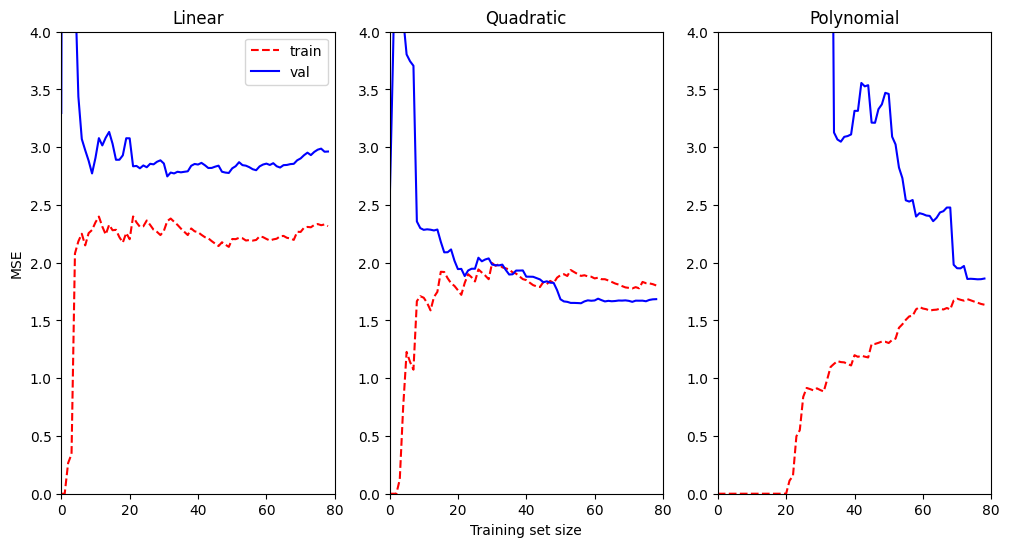

In [96]:
plt.figure(figsize=(12,6))

plt.subplot(131); 
plt.plot(np.sqrt(linear_learning_curves[0]), "r--", label="train")
plt.plot(np.sqrt(linear_learning_curves[1]), "b-", label="val")
plt.legend(loc="upper right")   
plt.ylabel("MSE")
plt.title("Linear")
plt.axis([0, 80, 0, 4])             

plt.subplot(132); 
plt.plot(np.sqrt(quadratic_learning_curves[0]), "r--", label="train")
plt.plot(np.sqrt(quadratic_learning_curves[1]), "b-", label="val")  
plt.xlabel("Training set size") 
plt.title("Quadratic")
plt.axis([0, 80, 0, 4])  

plt.subplot(133); 
plt.plot(np.sqrt(polynomial_learning_curves[0]), "r--", label="train")
plt.plot(np.sqrt(polynomial_learning_curves[1]), "b-", label="val")  
plt.title("Polynomial")
plt.axis([0, 80, 0, 4])

plt.show() 

Look at the performance of the linear model on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better. 

Look at the performance of the linear model on the validation data. When the
model is trained on very few training instances, it is incapable of generalizing
properly, which is why the validation error is initially quite big. Then, as the
model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve. These learning curves are **typical of a model that’s underfitting: both curves have reached a plateau; they are close and fairly high**.

Look  at the curves of the polynomial model, these learning curves look a bit similar to the previous, but there is an important differences: the error on the training data is much lower and there is a big gap between the curves. This means that the model performs **significantly better on the training data than on the validation data, which is the hallmark of overfitting**. 

In the curves of the quadratic model we don't have the gap (differently from the overfitting case) and the error is lower (than in the underfitting case).

Considering the model generalization error, we can express it as the sum of three different contributions:

- **Bias** is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
- **Variance**  is the difference in fits between different training sets and it is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.
- **Irreducible error** is due to the noisiness of the data itself. The only way to reduce it is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

For example, a simple linear model will make a lot of mistakes for pretty much any training set, which means that it has a high bias. However, any two randomly chosen training sets should give pretty similar models. So we say that it has a low variance. **High bias and low variance typically correspond to underfitting**. On the other hand, a higly non linear complex model will probably fit a linear training set perfectly. It has **low bias and high variance corresponds to overfitting**.

Increasing model complexity will typically increase variance and reduce bias. Conversely, reducing model complexity increases bias and reduces variance. This is why it is called a [**trade-off**](https://www.youtube.com/watch?v=EuBBz3bI-aA).

![](images/bias-variance-trade-off.png)


## Regularized models

A way **to reduce overfitting** is to regularize the model (constrain it): **the fewer degrees of freedom it has, the harder it will be for it to overfit the data**. For a linear model, regularization is typically achieved by constraining the weights of the model.

### Ridge, Lasso and Elastic Net Regularization

Those methods adda a term to the cost function in order to force the algorithm to not only fit the data but also **keep the model weights as small as possible**. The penalty term can ebe the **sum of the absolute value of the magnitude of coefficients** (L2 penalty, **Ridge Regularization**)

$\displaystyle J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum\limits_{i=1}^{n}\theta^2_i$

or a L1 penalty (**Lasso Regularization**: Least Absolute Shrinkage and Selection Operator):

$\displaystyle J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum\limits_{i=1}^{n}\left|\theta_i\right|$
 
or a simple mix of both terms, controlled by a ratio parameter (**Elastic Net**):  

$\displaystyle J(\theta) = \text{MSE}(\theta) + r \alpha \sum\limits_{i=1}^{n}\left|\theta_i\right| + \frac{1-r}{2} \alpha \sum\limits_{i=1}^{n}\theta^2_i$

The hyperparameter alpha controls how much we want to regularize the model. Note that penalty term should only be added during training and not to evaluate. In order to understand the influence on the cost function, we can consider only two features and plot the penalty term. It as a paraboloid that grows as the model parameters move away from the origin: 

In [97]:
def ridge(theta):
    return theta[0]**2 + theta[1]**2

In [98]:
def lasso(theta):
    return np.abs(theta[0]) + np.abs(theta[1])

In [99]:
def elastic_net(theta):
    return lasso(theta) + ridge(theta)

Text(0.5, 0.92, 'Elastic Net')

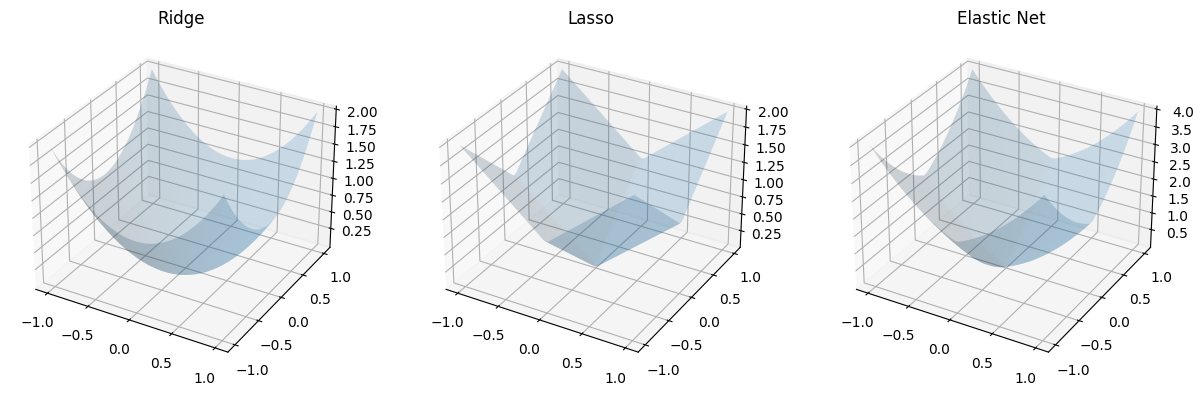

In [103]:
fig = plt.figure(figsize = [15, 8])

ax = fig.add_subplot(131, projection='3d')
show_f(ax, ridge, 1, -1, 1, -1) 
plt.title("Ridge")            

ax = fig.add_subplot(132, projection='3d')
show_f(ax, lasso, 1, -1, 1, -1) 
plt.title("Lasso") 

ax = fig.add_subplot(133, projection='3d')
show_f(ax, elastic_net, 1, -1, 1, -1) 
plt.title("Elastic Net")

The coefficients value obtained can be used **to identify the most important features in the dataset** (feature selection). Features with larger coefficients can be considered more important. It is **important to scale the data before performing regularization**, as it is sensitive to the scale of the input features. We can show the effect of regularization on a high-degree polynomial model using different value of alpha:

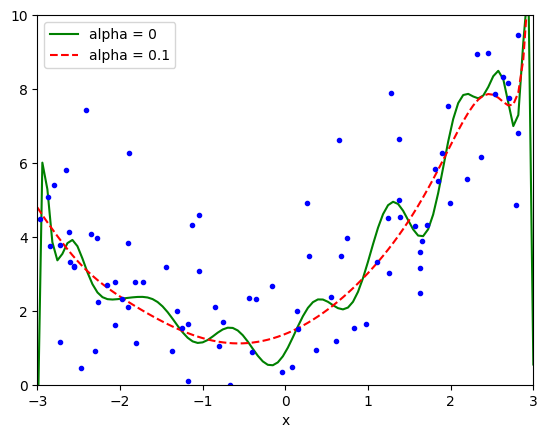

In [105]:
from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet

alphas=(0,  0.1)

for alpha, style in zip(alphas, ("g-", "r--")):
    
    regularizer = Ridge(alpha=alpha)
    #regularizer = Lasso(alpha)  
    #elastic_reg = ElasticNet(alpha, l1_ratio=0.5)
    
    model = Pipeline([ ("features", PolynomialFeatures(degree=20, include_bias=False)),
                       ("std_scaler", StandardScaler()),
                       ("regularizer", regularizer) ])

    model.fit(X, y.ravel())

    y_new = model.predict(X_new)

    plt.plot(X_new, y_new, style, label=r"alpha = {}".format(alpha))

plt.plot(X, y, "b.")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.axis([-3, 3, 0, 10])

plt.show()

Note how increasing alpha leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias. So when should we use plain Linear Regression, Ridge, Lasso, or Elastic Net? It is almost always preferable to have **at least a little bit of regularization**, so generally we should avoid plain Linear Regression. **Ridge is a good default**, but **if we suspect that only a few features are useful, we should prefer Lasso or Elastic Net**, because they tend to reduce the useless features’ weights down to zero. In general, **Elastic Net is preferred over Lasso**, because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

### Early Stopping

A very different way to regularize iterative learning algorithms is to **stop training as soon as the validation error reaches a minimum**. This is called **early stopping**.  

![](images/early-stopping.png)

In the following, a complex model (high-degree Polynomial Regression model) is being trained with BGD. As the epochs go, the prediction error on the training/validation set goes down. After a while, the validation error stops decreasing and starts to go back up. This indicates that **the model has started to overfit** the training data. With early stopping **we just stop training as soon as the validation error reaches the minimum**.

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([ ("features", PolynomialFeatures(degree=90, include_bias=False)),
                         ("scaler", StandardScaler()) ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)


In [107]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category = ConvergenceWarning)

n_epochs = 500

train_errors = [] 
val_errors = []

for epoch in range(n_epochs):
    
    sgd_reg.fit(X_train_poly_scaled, y_train)
    
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

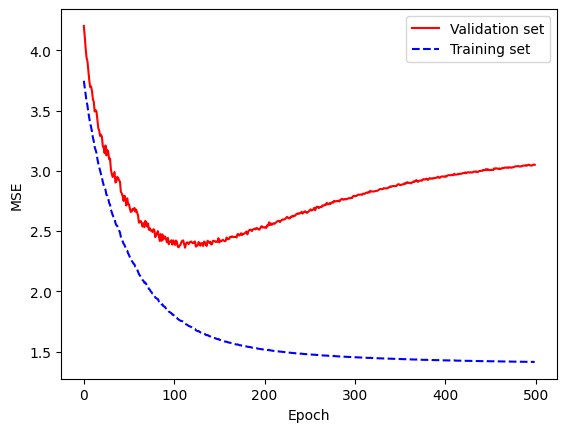

In [108]:
plt.plot(np.sqrt(val_errors), "r-", label="Validation set")
plt.plot(np.sqrt(train_errors), "b--", label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.show()

After some epochs, the validation error stops decreasing and actually starts to go back up. So we can stop the algorithm and the final model parameters are the ones that have the lowest validation error.

## Logistic regression

Some regression algorithms can be used for classification. **Logistic Regression** is used **to estimate the probability that an instance belongs to a particular class**. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class, otherwise it predicts that it does not. This makes it a **binary classifier**. The Logistic Regression model computes a weighted sum of the input features (plus a bias term) and outputs the logistic of this result:

$\displaystyle \hat{p}=h_\theta(x)= \sigma(x^{T}\theta)$

The logistic ($\sigma()$) is a sigmoid function that outputs a number between 0 and 1 

$\displaystyle \sigma(t) = \frac{1}{1+e^{-t}}$

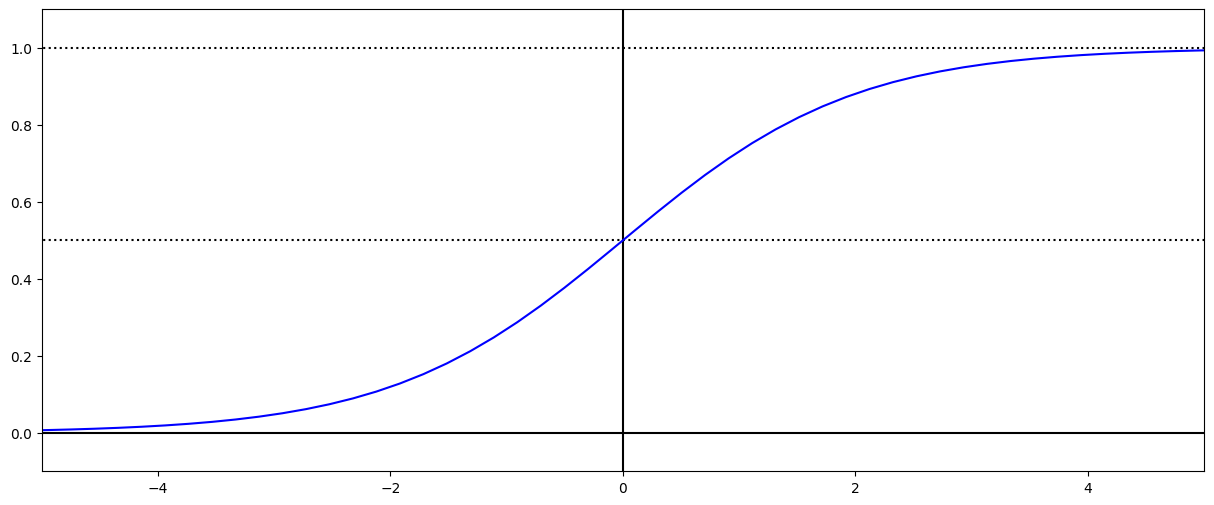

In [65]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(15, 6))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-")
plt.axis([-5, 5, -0.1, 1.1])

plt.show()

Once the model has estimated the probability than the prediction is:

$\displaystyle \hat{y} = 0 \text{ if } \hat{p}< 0.5$

$\displaystyle \hat{y} = 1 \text{ if } \hat{p}> 0.5$

![](images/logistic-regression.png)

The objective of training is to set the parameter vector so that the model estimates high probabilities for positive instances and low probabilities for negative instances. We can define the following cost function:

$\displaystyle J(\theta) = -\frac{1}{m} \sum\limits_{i=1}^{m} [y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})]$


Considering a single instance, this makes sense because: 

![](images/cost-logistic-regression.png)

- the log function grows very large when approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance;
- the log function is close to 0 when near 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

It is convex function, so Gradient Descent is guaranteed to find the global minimum. The partial derivatives of the cost function are:

$\displaystyle
\frac{\partial J}{\partial \theta_j} = \frac{1}{m}\sum\limits_{i=1}^{m} ((\theta^{T}x^{(i)})-y^{(i)})x^{(i)}_{j}$

Here we can find the derivation of this formula [link](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d). Once we have the gradient vector containing all the partial derivatives, we can use it in the BGD\SGD or MGD algorithms.

We can use the [**Iris dataset**](https://archive.ics.uci.edu/ml/datasets/iris) to illustrate Logistic Regression. It is a common used dataset containing the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica. 

![](images/iris-flowers.png)

![](images/petal-sepal-dataset.png)

Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature.

In [3]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load the dataset
iris = datasets.load_iris()
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris virginica, else 0

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Train a logistic regression model:

In [67]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Let’s look at the model estimated probabilities for flowers with petal widths varying from 0 cm to 3 cm

In [84]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [68]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

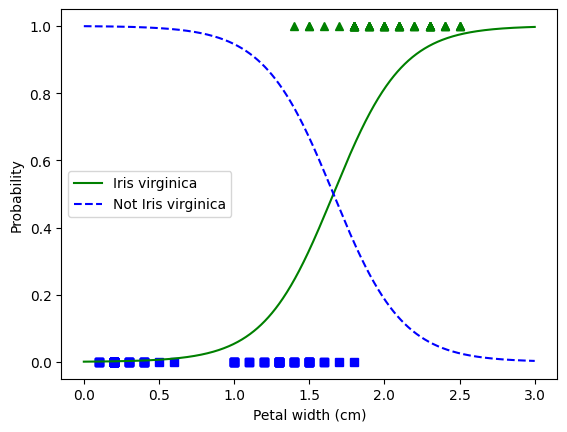

In [69]:
# Plot the flowers
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

# Plot the information about decision
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")

plt.show()

The petal width of Iris virginica ranges from 1.4 cm to 2.5 cm, while the other iris flowers generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm. Notice
that there is a bit of overlap: 
- above about 2 cm the classifier is highly confident that the flower is an Iris virginica (it outputs a high probability for that class)
- below 1 cm it is highly confident that it is not an Iris virginica (high probability for the “Not Iris virginica” class). 
- in between the classifier is unsure. 

There is a **decision boundary** at around 1.65 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm, the classifier will predict that the flower is an Iris virginica, and otherwise it will predict that it is not (even if it is not very confident).

In [70]:
print(log_reg.predict([[1.6], [1.70]]))
print(log_reg.predict_proba([[1.60], [1.70]]))

[0 1]
[[0.56507207 0.43492793]
 [0.45722097 0.54277903]]


We can use two features: petal width and length and retrain the logistic regressor:

In [71]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

In [72]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [73]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

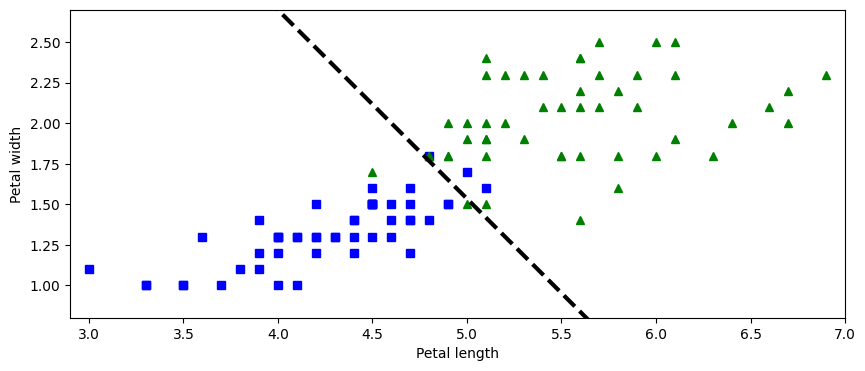

In [74]:
plt.figure(figsize=(10, 4))

plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)

plt.xlabel("Petal length")
plt.ylabel("Petal width")

plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

Once trained, the Logistic Regression classifier can, based on these two features, estimate the probability that a new flower is an Iris virginica. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary. Just like the other linear models, Logistic Regression models can be regularized.

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called **Softmax Regression** (or **Multinomial Logistic Regression**). The idea is simple: when given an instance, the model computes a score for each class using the linear regression formula (where each class has its own parameter vector):

$\displaystyle s_k(x) = x^{T}\theta^{(k)}$

then it estimates the probability that the instance belongs to a particular class by applying the **softmax function** to the score:

$\displaystyle \hat{p}_k = \sigma (s(x))_k = \frac{e^{s_k(x)}}{\sum\limits_{i=1}^{K} e^{s_j(x)}}$

where
- $K$ is the number of classes
- $s(x)$ is a vector containing the scores of each class for the instance $x$
- $\sigma(s(x))$ is the estimated probability that the instance $x$ belongs to class $k$

Finally, the classifier predicts the class with the highest estimated probability:

$\displaystyle \hat{y} = \underset{k}{\text{argmax}}(\sigma(s(x)_k))= \underset{k}{\text{argmax}}(((\theta^{(k)})^{(T)}x))$

The softmax function apply a standard exponential function to each element, and then normalize these values by dividing by the sum of all the exponentials. Doing so it ensures the sum of all exponentiated values adds up to 1. Since we’re dealing with probabilities this is really useful. 

![](images/softmax-in-action.png)

This classifier predicts only one class at a time (it is multiclass, not multioutput), so it should be used only with mutually exclusive classes.

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes), we can use as cost function the [**cross entropy**](https://www.youtube.com/watch?v=ErfnhcEV1O8):

$\displaystyle J(\theta) = \frac{1}{m} \sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K} y^{(i)}_k\log(\hat{p}^{(i)}_k)$

Notice that when there are just two classes (K = 2), this cost function is equivalent to the Logistic Regression’s cost function.

The gradient vector of this cost function is given by:

$\displaystyle \nabla_{\theta^{(k)}}J(\theta) = \frac{1}{m} \sum\limits_{i=1}^{m} (\hat{p}^{(i)}_k-y^{(i)}_k)x^{(i)}$

Now we can compute the gradient vector for every class, then use BGD (or any other optimization algorithm) to find the parameter matrix that minimizes the cost function.

Let’s use Softmax Regression to classify the iris flowers into all three classes. In order to use Scikit-Learn LogisticRegression, we can set the **multi_class** hyperparameter to "multinomial" to switch it to Softmax Regression.

In [75]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [76]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

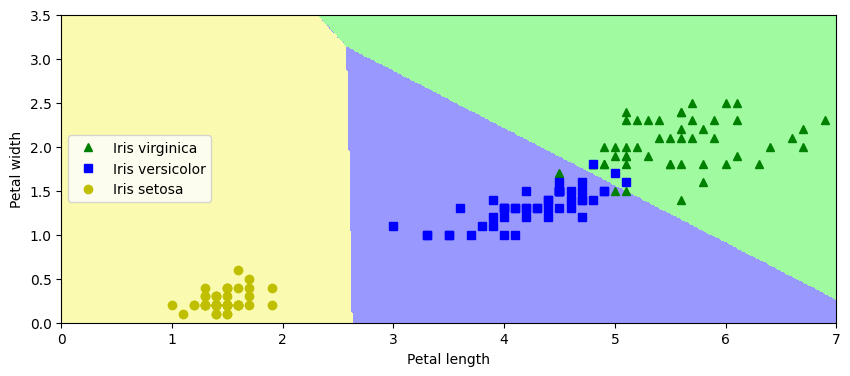

In [77]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]

y_predict = softmax_reg.predict(X_new)

zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0, 7, 0, 3.5])

plt.show()

The figure shows the resulting decision boundaries, represented by the background colors. Notice that the decision boundaries between any two classes are linear.

## Exercise

**1 - Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn) on the Iris dataset**

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [4]:
# Laod dataset

X = iris["data"][:, (2, 3)]
X_with_bias = np.c_[np.ones([len(X), 1]), X]
y = iris["target"]

In [5]:
# Splitting dataset

test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [6]:
# Define number of inputs and outputs

n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

The targets are class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [7]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

y_train_one_hot = to_one_hot(y_train)
y_valid_one_hot = to_one_hot(y_valid)
y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function:

In [8]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

Now we need the cost function and gradients. Note that log(x) may not be computable if x=0. So we will add a tiny value epsilon to avoid getting `nan` values.

In [10]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    p_k = softmax(X_train.dot(Theta))
    loss = -np.mean(np.sum(y_train_one_hot * np.log(p_k + epsilon), axis=1))
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(p_k - y_train_one_hot)
    Theta = Theta - eta * gradients


0 4.04952595993705
500 0.71427092955479
1000 0.6216162386650036
1500 0.5609131918625363
2000 0.5178692167148978
2500 0.48534353510916856
3000 0.45955502607641247
3500 0.43835752423616375
4000 0.42045125434929087
4500 0.4050034717862778
5000 0.3914545880952614


And that's it! The Softmax model is trained. Let's make some predictions:

In [11]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.8333333333333334

Now let's add early stopping and regularization. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [16]:
eta = 0.01
n_iterations = 100000000
m = len(X_train)
epsilon = 1e-7
best_loss = np.infty
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    p_k = softmax(X_train.dot(Theta))
    xentropy_loss = -np.mean(np.sum(y_train_one_hot * np.log(p_k + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss    
    gradients = 1/m * X_train.T.dot(p_k - y_train_one_hot) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    p_k = softmax(X_valid.dot(Theta))
    xentropy_loss = -np.mean(np.sum(y_valid_one_hot * np.log(p_k + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    
    if iteration % 100000 == 0:
        print(iteration, loss)
    
    if loss < best_loss:
        best_loss = loss
    
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.114284920793001


100000 0.4855446360954657
200000 0.4855430743189244
256267 0.48554307394881147
256268 0.48554307394881147 early stopping!


In [17]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

And now let's measure the final model's accuracy on the test set:

In [18]:
logits = X_test.dot(Theta)
y_predict = np.argmax(softmax(logits), axis=1)

accuracy_score = np.mean(y_predict == y_test)
print(accuracy_score)

1.0
